In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Dense

In [2]:
data = pd.read_csv('STZ.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,7/22/2015,116.889999,119.410004,116.489998,119.370003,112.188835,1051600
1,7/23/2015,119.360001,119.580002,117.349998,117.559998,110.487724,642300
2,7/24/2015,117.430000,118.129997,116.320000,116.430000,109.425705,668000
3,7/27/2015,116.010002,117.400002,115.410004,117.339996,110.280952,998000
4,7/28/2015,118.000000,118.000000,116.550003,117.739998,110.656883,752400


In [3]:
data1 = data.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
data1.head()

,Date,Close
0,7/22/2015,119.370003
1,7/23/2015,117.559998
2,7/24/2015,116.430000
3,7/27/2015,117.339996
4,7/28/2015,117.739998


Text(0.5, 1.0, 'STZ (Constellation Brands) Stock History')

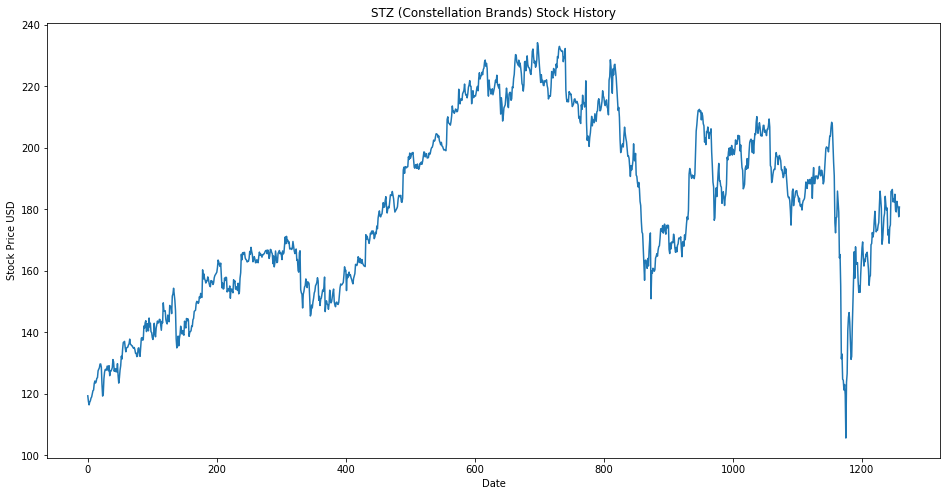

In [4]:
data1["Date"]=pd.to_datetime(data1.Date,format="%m/%d/%Y")
plt.figure(figsize=(16,8))
plt.plot(data1["Close"])
plt.ylabel('Stock Price USD')
plt.xlabel('Date')
plt.title('STZ (Constellation Brands) Stock History')

In [5]:
model_df = data1.iloc[0:619,:]
model_df.head()

,Date,Close
0,2015-07-22,119.370003
1,2015-07-23,117.559998
2,2015-07-24,116.430000
3,2015-07-27,117.339996
4,2015-07-28,117.739998


In [6]:
from sklearn.model_selection import train_test_split

input_data = []
output_data = []

for i in range(60,len(model_df)):
    input_data.append(model_df.loc[i-60:i,"Close"])
    output_data.append(model_df.loc[i,"Close"])

X = np.array(input_data)
y = np.array(output_data).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)

In [7]:
# Scale the data
X_scaler=MinMaxScaler(feature_range=(0,1)).fit(X_train)
y_scaler=MinMaxScaler(feature_range=(0,1)).fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [8]:
# Reshape training data to fit model
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0],X_train_scaled.shape[1],1))

In [9]:
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(X_train_scaled.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_scaled,y_train_scaled,epochs=10,batch_size=65,verbose=2)

Train on 419 samples
Epoch 1/10
419/419 - 4s - loss: 0.1151
Epoch 2/10
419/419 - 0s - loss: 0.0242
Epoch 3/10
419/419 - 0s - loss: 0.0127
Epoch 4/10
419/419 - 0s - loss: 0.0075
Epoch 5/10
419/419 - 0s - loss: 0.0050
Epoch 6/10
419/419 - 0s - loss: 0.0025
Epoch 7/10
419/419 - 0s - loss: 0.0018
Epoch 8/10
419/419 - 0s - loss: 0.0016
Epoch 9/10
419/419 - 0s - loss: 0.0015
Epoch 10/10
419/419 - 0s - loss: 0.0014


In [10]:
# Reshape testing data to fit new model
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [11]:
# Evaluate the model
model_loss = model.evaluate(X_test_scaled, y_test_scaled, verbose=2)
print(f"Loss: {model_loss}")

140/1 - 1s - loss: 0.0015
Loss: 0.0015514860162511468


In [12]:
# Predict y values for test data, then see how closely they match actuals
predicted_closing_price=model.predict(X_test_scaled)
predicted_closing_price=y_scaler.inverse_transform(predicted_closing_price)
predicted_closing_price

array([[135.9914 ],
       [160.06514],
       [184.14215],
       [141.41872],
       [183.11115],
       [219.9794 ],
       [159.28833],
       [168.86575],
       [168.96686],
       [197.78024],
       [165.16235],
       [156.59846],
       [135.67374],
       [221.30258],
       [165.75554],
       [157.21895],
       [172.52101],
       [159.24503],
       [223.08884],
       [155.1687 ],
       [163.9435 ],
       [161.97948],
       [158.04807],
       [221.8471 ],
       [163.3955 ],
       [198.122  ],
       [144.94576],
       [170.8753 ],
       [142.30988],
       [161.27147],
       [176.492  ],
       [164.8861 ],
       [156.38873],
       [167.10966],
       [157.01369],
       [157.61243],
       [155.31024],
       [183.7682 ],
       [183.69878],
       [154.26918],
       [137.55992],
       [156.1905 ],
       [161.97673],
       [141.477  ],
       [164.78279],
       [145.19533],
       [168.51485],
       [155.5546 ],
       [197.56816],
       [205.6329 ],


In [13]:
predicted_stock_price = [predicted_closing_price[i][0] for i in range(len(predicted_closing_price))]

In [14]:
new_data = pd.DataFrame({"Predicted": predicted_stock_price})
new_data

,Predicted
0,135.991394
1,160.065140
2,184.142151
3,141.418716
4,183.111145
...,...
135,166.378235
136,152.805130
137,165.811844
138,150.231842


In [15]:
actual_values = y_test_scaled.reshape((y_test_scaled.shape[0], y_test_scaled.shape[1]))
actual_values = y_scaler.inverse_transform(actual_values)
actual_values

array([[134.979996],
       [154.479996],
       [179.899994],
       [141.399994],
       [185.830002],
       [218.089996],
       [165.990005],
       [169.570007],
       [172.089996],
       [194.679993],
       [166.020004],
       [151.110001],
       [135.259995],
       [217.580002],
       [166.470001],
       [159.589996],
       [177.199997],
       [161.470001],
       [222.75    ],
       [153.649994],
       [171.270004],
       [163.690002],
       [157.559998],
       [220.449997],
       [170.369995],
       [193.039993],
       [142.75    ],
       [171.059998],
       [144.169998],
       [163.679993],
       [180.279999],
       [163.619995],
       [156.639999],
       [172.210007],
       [159.610001],
       [154.149994],
       [157.300003],
       [184.5     ],
       [184.550003],
       [160.089996],
       [143.190002],
       [156.839996],
       [152.429993],
       [138.570007],
       [163.080002],
       [143.449997],
       [167.119995],
       [165.3

In [16]:
actuals = [actual_values[i][0] for i in range(len(actual_values))]
new_data["Actual"] = actuals
new_data

,Predicted,Actual
0,135.991394,134.979996
1,160.065140,154.479996
2,184.142151,179.899994
3,141.418716,141.399994
4,183.111145,185.830002
...,...,...
135,166.378235,165.990005
136,152.805130,157.770004
137,165.811844,165.589996
138,150.231842,157.369995


In [17]:
inputs = []

for i in range(619,len(data1)):
    inputs.append(data1.loc[i-60:i,"Close"])

X_forecast = np.array(inputs)
X_forecast_scaled = X_scaler.transform(X_forecast)

In [18]:
# Reshape data to use in model
X_forecast_scaled = X_forecast_scaled.reshape((X_forecast_scaled.shape[0],X_forecast_scaled.shape[1],1))

In [19]:
forecasted_closing_price = model.predict(X_forecast_scaled)
forecasted_closing_price=y_scaler.inverse_transform(forecasted_closing_price)
forecasted_closing_price

array([[229.12077],
       [229.36684],
       [229.34906],
       [229.2597 ],
       [229.05067],
       [228.73874],
       [228.31944],
       [227.84729],
       [227.38683],
       [226.90776],
       [226.44804],
       [226.05673],
       [225.75882],
       [225.5781 ],
       [225.46541],
       [225.47542],
       [225.51195],
       [225.54079],
       [225.54095],
       [225.5503 ],
       [225.43626],
       [225.09514],
       [224.71858],
       [224.27545],
       [223.64078],
       [222.9226 ],
       [222.23212],
       [221.60071],
       [221.04483],
       [220.6429 ],
       [220.4512 ],
       [220.3729 ],
       [220.28941],
       [220.17831],
       [220.16199],
       [220.23132],
       [220.35574],
       [220.44254],
       [220.5179 ],
       [220.6891 ],
       [220.91873],
       [221.2651 ],
       [221.74199],
       [222.40266],
       [223.25517],
       [224.22395],
       [225.20279],
       [226.15536],
       [227.03612],
       [227.87225],


In [20]:
forecast = [forecasted_closing_price[i][0] for i in range(len(forecasted_closing_price))]

In [21]:
forecasted_stock = data1.iloc[619:,:]
forecasted_stock

,Date,Close
619,2018-01-04,225.789993
620,2018-01-05,219.880005
621,2018-01-08,216.839996
622,2018-01-09,222.080002
623,2018-01-10,219.360001
...,...,...
1254,2020-07-15,182.630005
1255,2020-07-16,181.240005
1256,2020-07-17,180.610001
1257,2020-07-20,177.600006


In [22]:
forecasted_stock["Prediction"] = forecast
forecasted_stock

C:\Users\Joymode\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Close,Prediction
619,2018-01-04,225.789993,229.120773
620,2018-01-05,219.880005,229.366837
621,2018-01-08,216.839996,229.349060
622,2018-01-09,222.080002,229.259705
623,2018-01-10,219.360001,229.050674
...,...,...,...
1254,2020-07-15,182.630005,182.212814
1255,2020-07-16,181.240005,182.444748
1256,2020-07-17,180.610001,182.584549
1257,2020-07-20,177.600006,182.597946


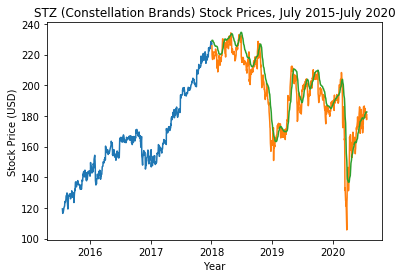

In [23]:
model_df = model_df.set_index("Date")
forecasted_stock = forecasted_stock.set_index("Date")
plt.plot(model_df["Close"])
plt.plot(forecasted_stock[['Close',"Prediction"]])
plt.title("STZ (Constellation Brands) Stock Prices, July 2015-July 2020")
plt.xlabel('Year')
plt.ylabel('Stock Price (USD)')
plt.savefig('STZ_Prediction.png')